In [ ]:
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [3]:
crime=pd.read_csv('crime_data.csv')

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.shape

(50, 5)

In [6]:
crime.duplicated().sum()

0

In [7]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

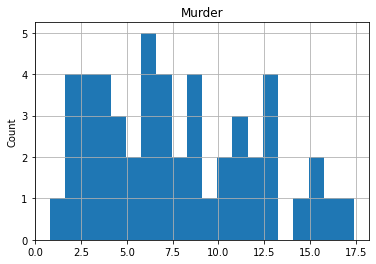

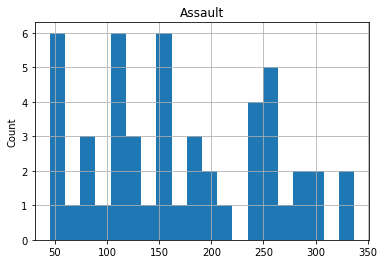

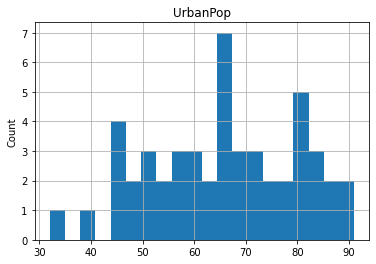

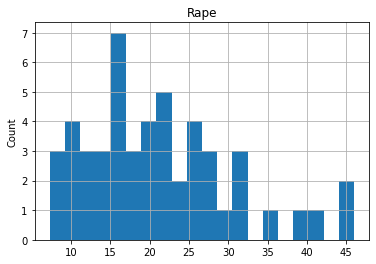

In [8]:
#EDA - for understanding the data 
for i in crime.iloc[:,1:].columns:
    crime.iloc[:,1:][i].hist(bins=20)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

# Hierarchical Clustering

In [9]:
#Before clustering Normalize the data

def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)


In [10]:
#After the normalizing , consider the numerical part of the data
crime1=norm_func(crime.iloc[:,1:])

In [11]:
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


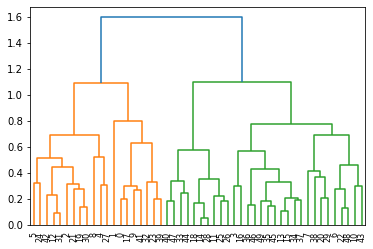

In [12]:
#create dendrogram and summarize the data in dendrogram  (display the clustering process)
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(crime1,method='complete'))

In [13]:
#Determining the no of clusters to be formed by using the simple formula:
limit =int((crime1.shape[0]/2)**0.5)
limit

5

In [14]:
#create clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [15]:
save=hc.fit_predict(crime1)

In [16]:
#Add a new column the no of clusters in the data
crime1['h_clusteriod']=save


In [17]:
crime1

,Murder,Assault,UrbanPop,Rape,h_clusteriod
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,4
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [18]:
#add in original data
crime['h_clusteriod']=save
crime=crime.rename({'Unnamed: 0':'city'},axis=1)

In [19]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusteriod
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [20]:
#Testing the(datas) city are located in which cluster
crime.groupby(['h_clusteriod'])['city'].apply(lambda x:tuple(x))

h_clusteriod
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Arizona, California, Colorado, Florida, Illin...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4                                            (Alaska,)
Name: city, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x11064d17eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x11064d2b430>,
 'boxes': [<matplotlib.lines.Line2D at 0x11064d17c40>],
 'medians': [<matplotlib.lines.Line2D at 0x11064d2b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x11064d2bbe0>],
 'means': []}

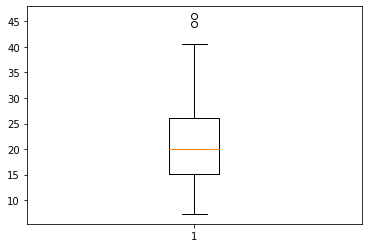

In [21]:
# Why Alaska is in 4th cluster because ((rape column) - has 44-45 datas are outliers, so it will be grouping in a similar cluster)
plt.boxplot(crime['Rape'])

# k means

In [22]:
crime2=pd.read_csv('crime_data.csv')

In [23]:
from sklearn.cluster import KMeans
crime1.head()

,Murder,Assault,UrbanPop,Rape,h_clusteriod
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,4
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1


In [24]:
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(crime1)

KMeans(n_clusters=5)

In [25]:
model_kmeans.labels_

array([2, 4, 3, 0, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 0, 2, 1, 3, 0, 3,
       0, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 0, 0])

In [26]:
model_kmeans.inertia_

3.5396316128448015

In [27]:
crime2['Labels']=model_kmeans.labels_
crime2=crime2.rename({'Unnamed: 0':'city'},axis=1)

In [28]:
crime2

,city,Murder,Assault,UrbanPop,Rape,Labels
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


F:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


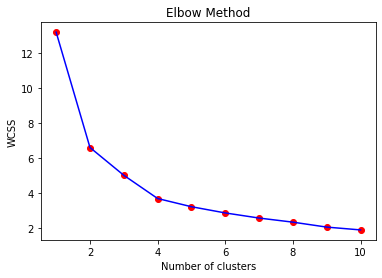

In [29]:
#ELBOW CURVE FOR - KMeans
datas=crime1.iloc[:,0:4] ##Normalized data

wcss=[] #wcss- within cluster sum of square (is the sum of squared distance between each point and the centroid in a cluster)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(datas)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,color='blue')    #plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

    

# silhouette_score

In [30]:
from sklearn.metrics import silhouette_score as sil
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(datas)
    sc_score.append(sil(datas,y))


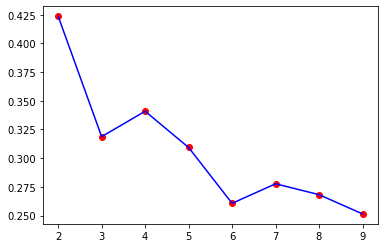

In [31]:
plt.plot(nc,sc_score,color='b')
plt.scatter(nc,sc_score,color='r')

In [32]:
crime2.groupby(['Labels'])['city'].apply(lambda x:tuple(x))

Labels
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
2    (Alabama, Georgia, Louisiana, Mississippi, Nor...
3    (Arizona, California, Colorado, Florida, Illin...
4                                            (Alaska,)
Name: city, dtype: object

# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
crime4=pd.read_csv('crime_data.csv')

In [35]:
crime4=crime.iloc[:,1:5]

In [36]:
crime4.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit_transform(crime4)


In [38]:
dbscan=DBSCAN(min_samples=6,eps=1)
dbscan.fit(stscaler)

DBSCAN(eps=1, min_samples=6)

In [39]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [40]:
crime5=crime2.iloc[:,0:5]

In [41]:
crime5['Cluster']=dbscan.labels_

In [42]:
crime5

,city,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


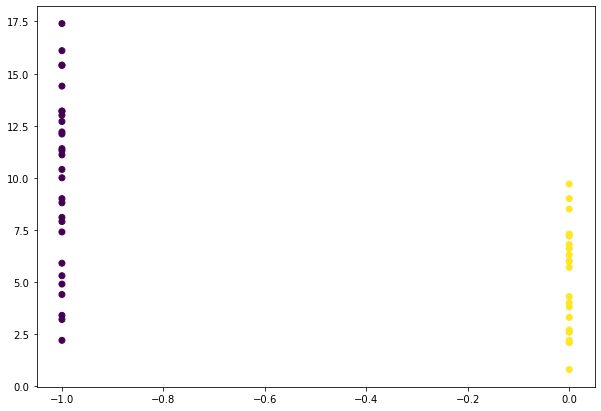

In [43]:

# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime5['Cluster'],crime5['Murder'], c=dbscan.labels_) 